# ``speXtra``

``speXtra`` is a python utility to manage and manipulate astronomical spectra. It consits of two parts

- A database that store and retrieve the spectra (and eventually other data)
- A wrapper over ``synphot`` that helps to perform typical tasks

``speXtra`` does not make measurements 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from spextra.database import SpecDatabase
from spextra import Spextrum

## Examining the database

In [2]:
sdb = SpecDatabase()

# Listing the available spectra
sdb.as_table()

library_name,title,type,resolution,spectral_coverage,templates
str7,str89,object,float64,object,object
kc96,The Kinney-Calzetti Spectral Atlas of Galaxies,galaxies,10.0,"['uv', 'vis']","['elliptical', 'bulge', 's0', 'sa', 'sb', 'sc', 'starb1', 'starb2', 'starb3', 'starb4', 'starb5', 'starb6']"
pickles,Pickles Stellar Spectral Flux Library,stars,5.0,"['uv', 'vis', 'nir']","['o5v', 'o8iii', 'o9v', 'b0i', 'b0v', 'b12iii', 'b1i', 'b1v', 'b2ii', 'b2iv', 'b3i', 'b3iii', 'b3v', 'b57v', 'b5i', 'b5ii', 'b5iii', 'b6iv', 'b8i', 'b8v', 'b9iii', 'b9v', 'a0i', 'a0iii', 'a0iv', 'a0v', 'a2i', 'a2v', 'a3iii', 'a3v', 'a47iv', 'a5iii', 'a5v', 'a7iii', 'a7v', 'f02iv', 'f0i', 'f0ii', 'f0iii', 'f0v', 'f2ii', 'f2iii', 'f2v', 'f5i', 'f5iii', 'f5iv', 'f5v', 'f6v', 'f8i', 'f8iv', 'f8v', 'rf6v', 'rf8v', 'wf5v', 'wf8v', 'g0i', 'g0iii', 'g0iv', 'g0v', 'g2i', 'g2iv', 'g2v', 'g5i', 'g5ii', 'g5iii', 'g5iv', 'g5v', 'g8i', 'g8iii', 'g8iv', 'g8v', 'rg0v', 'rg5iii', 'rg5v', 'wg0v', 'wg5iii', 'wg5v', 'wg8iii', 'k01ii', 'k0iii', 'k0iv', 'k0v', 'k1iii', 'k1iv', 'k2i', 'k2iii', 'k2v', 'k34ii', 'k3i', 'k3iii', 'k3iv', 'k3v', 'k4i', 'k4iii', 'k4v', 'k5iii', 'k5v', 'k7v', 'rk0iii', 'rk0v', 'rk1iii', 'rk2iii', 'rk3iii', 'rk4iii', 'rk5iii', 'wk0iii', 'wk1iii', 'wk2iii', 'wk3iii', 'wk4iii', 'm0iii', 'm0v', 'm1iii', 'm1v', 'm2.5v', 'm2i', 'm2iii', 'm2v', 'm3ii', 'm3iii', 'm3v', 'm4iii', 'm4v', 'm5iii', 'm5v', 'm6iii', 'm6v', 'm7iii', 'm8iii', 'm9iii', 'm10iii']"
sdss,A High Resolution Atlas of Composite SDSS Galaxy Spectra,galaxies,1.0,"['uv', 'vis']","['BG', 'G', 'GG', 'h_BG', 'h_G', 'h_GG', 'hh_BG', 'hh_G', 'hh_GG', 'hh_RG', 'h_RG', 'l_BG', 'l_G', 'l_GG', 'l_RG', 'p_BG', 'p_G', 'p_GG', 'p_RG', 'RED0', 'RED1', 'RED2', 'RED3', 'RED4', 'RG', 's_BG', 'SF1', 'SF2', 'SF3', 'SF4', 's_G', 's_GG', 's_RG', 't_BG', 't_G', 't_GG', 't_RG']"
irtf,The IRTF Spectral Library,"['stars', 'brown dwarfs', 'planets']",0.0015,"['nir', 'mir']","['C7', 'C-J4', 'C-J5', 'C-N4.5C', 'C-N4C23', 'C-N5C26', 'C-R2', 'F0Ia', 'F0Ib', 'F0II', 'F0IIIa', 'F0III-IVn', 'F0IV', 'F0V', 'F1II', 'F1V', 'F2-F5Ib', 'F2Ib', 'F2III', 'F2V', 'F3V', 'F4III', 'F4V', 'F5.5III', 'F5Ib-G1Ib', 'F5III', 'F5II-III', 'F5V', 'F6III-IV', 'F6IV', 'F6V', 'F7II', 'F7III', 'F7V', 'F8.5IV-V', 'F8Ia', 'F8Ib', 'F8III', 'F8IV', 'F8V', 'F9.5V', 'F9IIIa', 'F9V', 'wF9V', 'G0Ib-II', 'G0V', 'G1.5V', 'G1Ib', 'G1III', 'G1II', 'G1-V', 'G1V', 'G2Ib', 'G2II', 'G2IV', 'G2V', 'G3Ib-II', 'G3II', 'G3IIIb', 'G3Va', 'G4Ia', 'G4III', 'G4O-Ia', 'G4V', 'G5Ib', 'G5IIIa', 'G5IIICN', 'G5V', 'G6.5V', 'G6IbH', 'G6Ib-IIa', 'G6IIb', 'G6III', 'G7.5IIIa', 'G7Ia', 'G7II', 'G7IIIa', 'G7IV', 'G8Ib', 'G8IIIBa1', 'G8IIIFe-1', 'G8IIIFe-5', 'G8V', 'G9IICN1H', 'G9III', 'K0.5IIb', 'K0.5IIICN1', 'K0Ia', 'K0Ib', 'K0II', 'K0III', 'K0V', 'K1.5IIIlines', 'K1.5IIIflux', 'K1Ia-Iab', 'K1-IIIb1', 'K1-IIIFe', 'K1III', 'K1IVa', 'K1IV', 'K1V', 'K2.5II', 'K2IIIFe', 'K2III', 'K2O-Ia', 'K2V', 'K3.5IIIb', 'K3Iab-Ib', 'K3+IIIFe05', 'K3IIIFe1', 'K3III', 'K3II-III', 'K3V', 'K4Ib', 'K4Ib-II', 'K4-III', 'K4V', 'K5.5III', 'K5Ib', 'K5III', 'K5V', 'K6IIIa', 'K7IIa', 'K7III', 'K7V', 'kA9hF2mF2', 'L0.5', 'L1', 'L2', 'L3', 'L3.5', 'L4.5', 'L5', 'L6', 'L7.5', 'L8', 'M0.5Ib', 'M0.5V', 'M0IIIb', 'M0V', 'M10+III', 'M1.5Iab-Ib', 'M1.5Ib', 'M1.5V', 'M1-Iab-Ib', 'M1Ia', 'M1+III', 'M1-M2Ia-Iab', 'M1V', 'M2.5IIIBa0.5', 'M2.5V', 'M2-Ia', 'M2Ib', 'M2II', 'M2III', 'M2V', 'M3.5I', 'M3.5III', 'M3.5V', 'M3Iab-Ia', 'M3IIb', 'M3III', 'M3-M4Iab', 'M3toM4', 'M3V', 'M4.5IIIa', 'M4.5V', 'M4+IIIa', 'M4+III', 'M4III', 'M4V', 'M5.5III', 'M5e-M9eIII', 'M5Ib-II', 'M5III', 'M5V', 'M6.5StoM7', 'M6.5V', 'M6e-M9eIII', 'M6-III', 'M6III', 'M6V', 'M7-8III', 'M7-III', 'M7-M7.5I', 'M7V', 'M8-9III', 'M8III', 'M8V', 'M9.5V', 'M9III', 'M9V', 'Jupiter', 'Neptune', 'Saturn', 'Uranus', 'S2.5Zr2', 'S4.5Zr2Ti4', 'S5-S6Zr3', 'SC5.5Zr', 'T2', 'T4.5']"
agn,THE AGN ATLAS,agn,10.0,"['uv', 'vis', 'nir']","['liner', 'ngc1068', 'qso', 'seyfert1', 'seyfert2']"
nebulae,THE GALACTIC EMISSION LINE OBJECT ATLAS,nebulae,10.0,"['uv', 'vis', 'nir']","['orion

## Retrieving the spectra

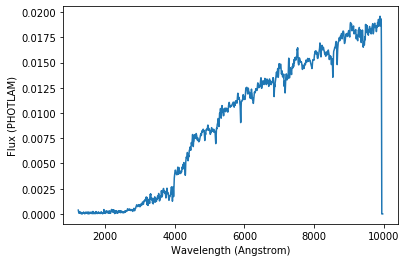

In [3]:
sp1 = Spextrum("kc96/s0")

sp1.plot()

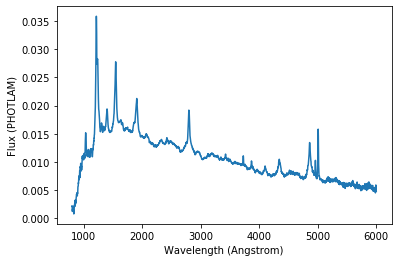

In [4]:
# another spectrum

sp2 = Spextrum("agn/qso")

sp2.plot()

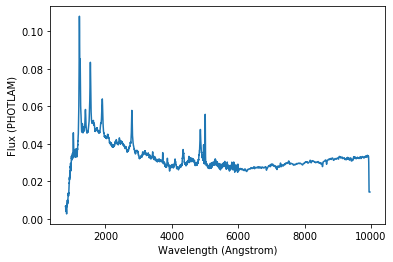

In [5]:
# arithmetics

sp = sp1 + 3*sp2

sp.plot()

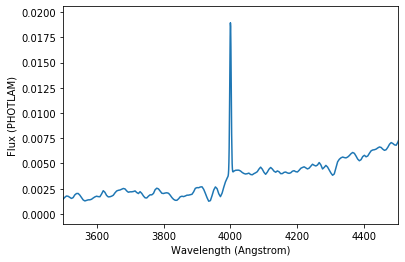

In [6]:
#Adding emission line

sp3 = sp1.add_emi_lines(center=4000,flux=4e-13, fwhm=5*u.AA)

sp3.plot(left=3500, right=4500)

  points: [3468.15043249 3470.37990221 3472.60937194 3474.83884167 3477.06831139
 3479.29778112 3481.52725084 3483.75672057 3485.9861903  3488.21566002
 3490.44512975 3492.67459947 3494.9040692  3497.13353892 3499.36300865
 3501.59247838 3503.8219481  3506.05141783 3508.28088755 3510.51035728
 3512.739827   3514.96929673 3517.19876646 3519.42823618 3521.65770591
 3523.88717563 3526.11664536 3528.34611508 3530.57558481]
  lookup_table: [-8.27575092e-06 -4.47942446e-05 -2.14504274e-04 -9.08758754e-04
 -3.40612194e-03 -1.12945960e-02 -3.31344784e-02 -8.59980295e-02
 -1.97467573e-01 -4.01145572e-01 -7.20953314e-01 -1.14633409e+00
 -1.61255375e+00 -2.00685557e+00 -2.20961679e+00 -2.15236902e+00
 -1.85487833e+00 -1.41420722e+00 -9.53914823e-01 -5.69252663e-01
 -3.00538055e-01 -1.40375978e-01 -5.80076201e-02 -2.12068530e-02
 -6.85908728e-03 -1.96270649e-03 -4.96870616e-04 -1.11283351e-04
 -2.20503762e-05] [synphot.models]


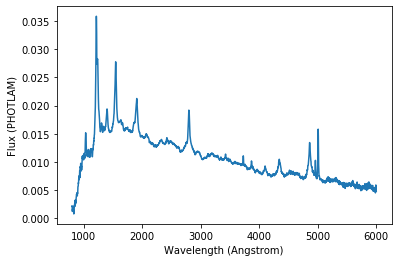

In [7]:
# Adding absorption lines

sp4 = sp2.add_abs_lines(center=3500 * u.AA , ew=3000, fwhm=15*u.AA)

sp4.plot()

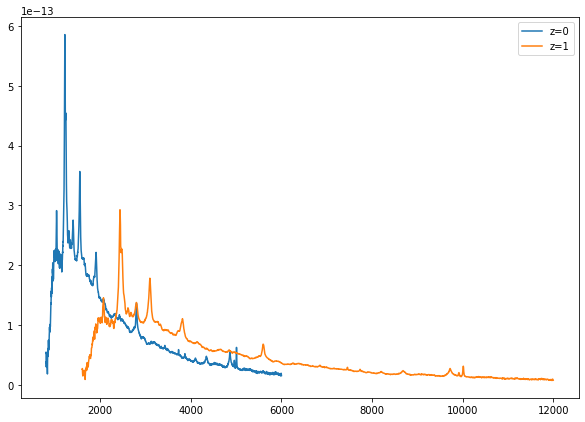

In [8]:
# Redshifting spectra

fig = plt.figure(figsize=(10,7))
sp4 = sp2.redshift(z=1)
plt.plot(sp2.waveset, 
         sp2(sp2.waveset, flux_unit="FLAM"))
plt.plot(sp4.waveset, 
         sp4(sp4.waveset, flux_unit="FLAM"))
plt.legend(['z=0', 'z=1'], loc='upper right')

(3000, 5000)

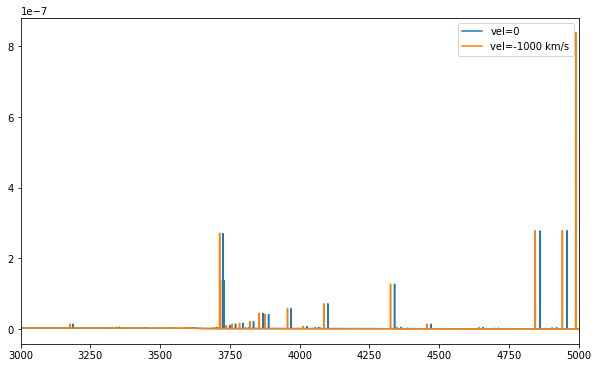

In [12]:
# Or using velocity
fig = plt.figure(figsize=(10,6))

sp1 = Spextrum("nebulae/orion")
sp2 = sp1.redshift(vel=-1000 * u.km / u.s)
plt.plot(sp1.waveset, 
         sp1(sp1.waveset, flux_unit="FLAM"))
plt.plot(sp2.waveset, 
         sp2(sp2.waveset, flux_unit="FLAM"))
plt.legend(['vel=0', 'vel=-1000 km/s'], loc='upper right')
plt.xlim(3000,5000)

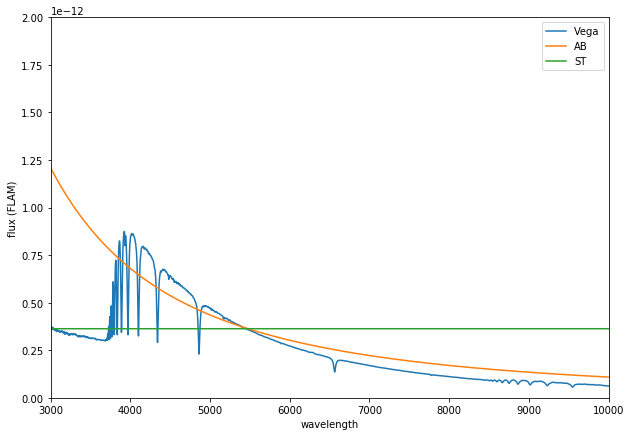

In [28]:
sp_vega = Spextrum.flat_spectrum(mag=10, system_name="vega")
sp_ab = Spextrum.flat_spectrum(mag=10, system_name="ab")
sp_st = Spextrum.flat_spectrum(mag=10, system_name="st")


fig = plt.figure(figsize=(10,7))
wave = sp_vega.waveset
plt.plot(wave, sp_vega(wave, flux_unit="FLAM"), label="Vega")
plt.plot(wave, sp_ab(wave, flux_unit="FLAM"), label="AB")
plt.plot(wave, sp_st(wave, flux_unit="FLAM"), label="ST")

plt.xlim(3000,1e4)
plt.ylim(0,0.2e-11)
plt.xlabel("wavelength")
plt.ylabel("flux (FLAM)")
plt.legend()

(4000, 7000)

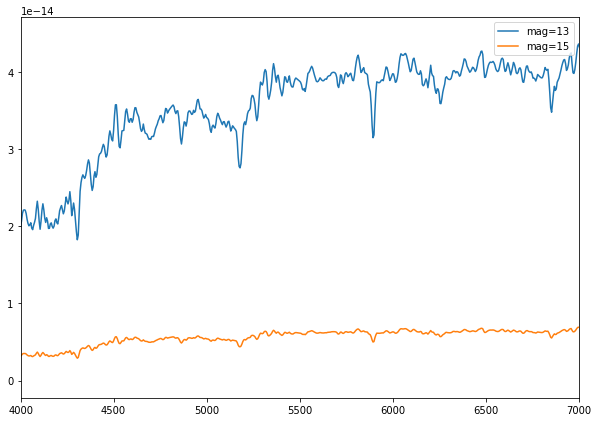

In [36]:
# Scaling to a magnitude

sp1 = Spextrum("kc96/s0").scale_to_magnitude(amplitude=13 * u.ABmag, filter_name="g")
sp2 = sp1.scale_to_magnitude(amplitude=15 * u.ABmag, filter_name="g")

sig = plt.figure(figsize=(10,7))
plt.plot(sp1.waveset, 
         sp1(sp1.waveset, flux_unit="FLAM"))
plt.plot(sp2.waveset, 
         sp2(sp2.waveset, flux_unit="FLAM"))
plt.legend(['mag=13', 'mag=15'], loc='upper right')
plt.xlim(4000,7000)

In [41]:
# Obtaining magnitudes

print("Magnitude spectra 1:", sp1.get_magnitude(filter_name="g"), 
      sp1.get_magnitude(filter_name="g", system_name="Vega"), "Vega")
print("Magnitude spectra 2:", sp2.get_magnitude(filter_name="g"), 
      sp2.get_magnitude(filter_name="g", system_name="Vega"), "Vega")



Magnitude spectra 1: 13.0 mag(AB) 13.097460834460694 mag
Magnitude spectra 2: 15.0 mag(AB) 15.097460834460694 mag


(1000, 4000)

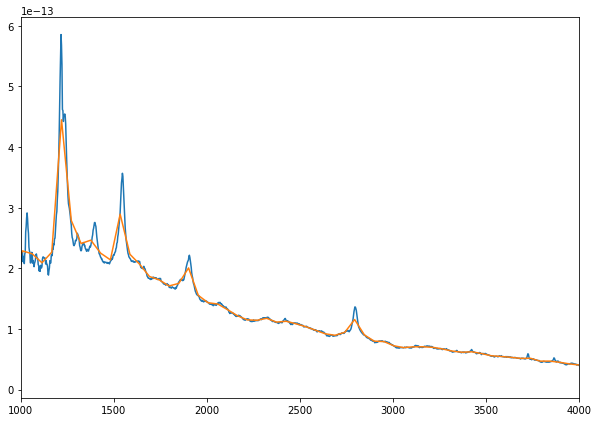

In [47]:
# Rebin spectra
sp1 = Spextrum("agn/qso")
new_waves = np.linspace(np.min(sp1.waveset),
                        np.max(sp1.waveset),
                        100)
sp2 = sp1.rebin_spectra(new_waves=new_waves)

sig = plt.figure(figsize=(10,7))
plt.plot(sp1.waveset, 
         sp1(sp1.waveset, flux_unit="FLAM"))
plt.plot(sp2.waveset, 
         sp2(sp2.waveset, flux_unit="FLAM"))
plt.xlim(1000,4000)

1000.0 11000.0 0.5


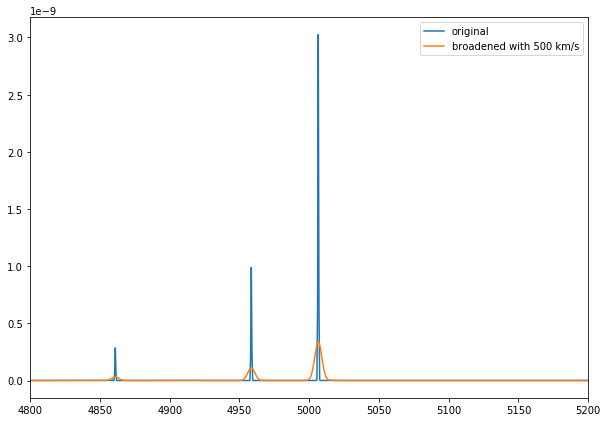

In [56]:
sp1 = Spextrum("nebulae/pn")        
sp2 = sp1.smooth(500*(u.km / u.s))


fig = plt.figure(figsize=(10,7))
plt.plot(sp1.waveset, 
         sp1(sp1.waveset, flux_unit="FLAM"), label="original")
plt.plot(sp2.waveset, 
         sp2(sp2.waveset, flux_unit="FLAM"), label="broadened with 500 km/s")

plt.xlim(4800,5200)
plt.legend()